In [82]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [70]:
temperatures = pd.read_csv('data.txt', header=None)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

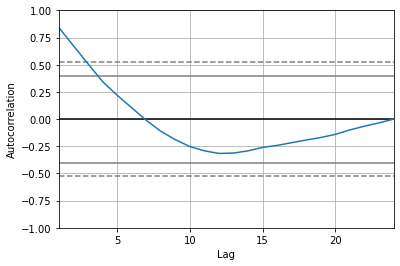

In [17]:
pd.plotting.autocorrelation_plot(temperatures)

C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   24
Model:                 ARIMA(4, 0, 1)   Log Likelihood                 -19.167
Date:                Tue, 10 Aug 2021   AIC                             52.334
Time:                        08:37:09   BIC                             60.580
Sample:                             0   HQIC                            54.522
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8029      7.415      4.019      0.000      15.269      44.337
ar.L1          0.6912      0.828      0.834      0.404      -0.932       2.315
ar.L2          1.1611      1.157      1.003      0.3

C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


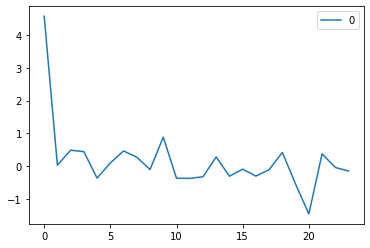

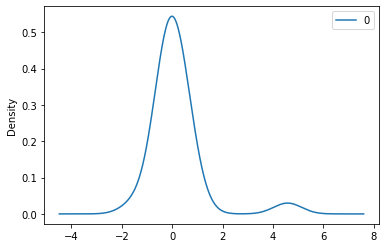

               0
count  24.000000
mean    0.155836
std     1.052476
min    -1.461265
25%    -0.313390
50%    -0.067457
75%     0.384607
max     4.577051


In [30]:
# fit model
model = ARIMA(temperatures, order=(4,0,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.308910, expected=33.900000


C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=33.639054, expected=32.620000
predicted=32.118459, expected=31.510000
predicted=30.644478, expected=30.730000
predicted=30.446835, expected=29.500000


C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.927332, expected=26.940000


C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.907930, expected=25.470000


C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.004272, expected=23.840000
predicted=22.746288, expected=22.550000
Test MSE: 0.757


C:\Users\Lucas\miniconda3\envs\polienv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


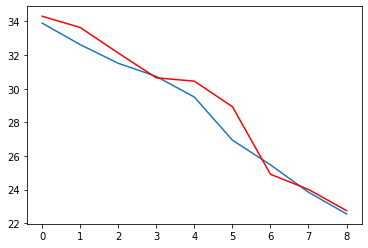

In [31]:
# split into train and test sets
X = temperatures.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mse = (mean_squared_error(test, predictions))
print('Test MSE: %.3f' % mse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [73]:
ini_date = '2021-01-01 00:00'
end_date = '2021-01-02 23:00'
temperatures['datetime'] = pd.date_range(ini_date,end_date,freq='H')

In [44]:
import numpy as np

In [74]:
# Seconds in day 
s_day = 24 * 60 * 60
# Seconds in year 
s_year = (365.25) * s_day

# Seasonality in a day
temperatures['day_sin'] = [np.sin((x.timestamp()) * (2 * np.pi / s_day)) for x in temperatures["datetime"]]
temperatures['day_cos'] = [np.cos((x.timestamp()) * (2 * np.pi / s_day)) for x in temperatures["datetime"]]

# Seasonality in a year
temperatures["year_cos"] = [np.cos((x.timestamp()) * (2 * np.pi / s_year)) for x in temperatures["datetime"]]
temperatures["year_sin"] = [np.sin((x.timestamp()) * (2 * np.pi / s_year)) for x in temperatures["datetime"]]

temperatures['year'] = [x.year for x in temperatures['datetime']]

In [75]:
temperatures

,0,datetime,day_sin,day_cos,year_cos,year_sin,year
0,34.38,2021-01-01 00:00:00,-6.012051e-12,1.000000e+00,0.999991,0.004301,2021
1,34.36,2021-01-01 01:00:00,2.588190e-01,9.659258e-01,0.999987,0.005017,2021
2,34.74,2021-01-01 02:00:00,5.000000e-01,8.660254e-01,0.999984,0.005734,2021
3,35.26,2021-01-01 03:00:00,7.071068e-01,7.071068e-01,0.999979,0.006451,2021
4,35.23,2021-01-01 04:00:00,8.660254e-01,5.000000e-01,0.999974,0.007168,2021
5,35.29,2021-01-01 05:00:00,9.659258e-01,2.588190e-01,0.999969,0.007884,2021
6,35.64,2021-01-01 06:00:00,1.000000e+00,8.575395e-12,0.999963,0.008601,2021
7,36.02,2021-01-01 07:00:00,9.659258e-01,-2.588190e-01,0.999957,0.009318,2021
8,36.10,2021-01-01 08:00:00,8.660254e-01,-5.000000e-01,0.999950,0.010035,2021
9,36.98,2021-01-01 09:00:00,7.071068e-01,-7.071068e-01,0.999942,0.010751,2021


In [78]:
endog = temperatures[:24][0]
exog = temperatures[:24][temperatures.drop(columns=[0,'datetime']).columns]

In [102]:
forecast = fit_res.get_forecast(360, exog=df_predict.drop(columns=['datetime']))

In [105]:

forecast.predicted_mean

24      -27.481450
25      -30.391887
26      -33.299936
27      -36.126595
28      -38.804281
          ...     
379   -4853.317627
380   -4878.162958
381   -4903.031735
382   -4927.889938
383   -4952.708285
Name: predicted_mean, Length: 360, dtype: float64

In [84]:
mod = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog, order=(4,1,1))
fit_res = mod.fit(disp=False, maxiter=250)
print(fit_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(4, 1, 1)   Log Likelihood                  -1.666
Date:                Tue, 10 Aug 2021   AIC                             25.333
Time:                        09:21:01   BIC                             37.823
Sample:                             0   HQIC                            28.474
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
day_sin       -0.5465      0.218     -2.511      0.012      -0.973      -0.120
day_cos       -1.9903      0.826     -2.411      0.016      -3.608      -0.372
year_cos    1.198e+05   6.84e+04      1.751      0.0

In [96]:
to_predict = pd.date_range(start=end_date,periods=15*24+1,freq='H')[1:]
df_predict = pd.DataFrame()
df_predict['datetime'] = to_predict
df_predict

,datetime
0,2021-01-03 00:00:00
1,2021-01-03 01:00:00
2,2021-01-03 02:00:00
3,2021-01-03 03:00:00
4,2021-01-03 04:00:00
...,...
355,2021-01-17 19:00:00
356,2021-01-17 20:00:00
357,2021-01-17 21:00:00
358,2021-01-17 22:00:00


In [97]:
# Seasonality in a day
df_predict['day_sin'] = [np.sin((x.timestamp()) * (2 * np.pi / s_day)) for x in df_predict["datetime"]]
df_predict['day_cos'] = [np.cos((x.timestamp()) * (2 * np.pi / s_day)) for x in df_predict["datetime"]]

# Seasonality in a year
df_predict["year_cos"] = [np.cos((x.timestamp()) * (2 * np.pi / s_year)) for x in df_predict["datetime"]]
df_predict["year_sin"] = [np.sin((x.timestamp()) * (2 * np.pi / s_year)) for x in df_predict["datetime"]]

df_predict['year'] = [x.year for x in df_predict['datetime']]

In [98]:
df_predict

,datetime,day_sin,day_cos,year_cos,year_sin,year
0,2021-01-03 00:00:00,-1.196689e-11,1.000000,0.999251,0.038696,2021
1,2021-01-03 01:00:00,2.588190e-01,0.965926,0.999223,0.039412,2021
2,2021-01-03 02:00:00,5.000000e-01,0.866025,0.999195,0.040128,2021
3,2021-01-03 03:00:00,7.071068e-01,0.707107,0.999166,0.040844,2021
4,2021-01-03 04:00:00,8.660254e-01,0.500000,0.999136,0.041561,2021
...,...,...,...,...,...,...
355,2021-01-17 19:00:00,-9.659258e-01,0.258819,0.957336,0.288977,2021
356,2021-01-17 20:00:00,-8.660254e-01,0.500000,0.957129,0.289663,2021
357,2021-01-17 21:00:00,-7.071068e-01,0.707107,0.956921,0.290349,2021
358,2021-01-17 22:00:00,-5.000000e-01,0.866025,0.956712,0.291035,2021
